# DES-SDSS-DECAM API

In [33]:
# std lib
from getpass import getpass
import warnings  
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning) # to quiet Astropy warnings

# 3rd party
import numpy as np
import json
import shutil
from numpy.core.defchararray import startswith
import pylab as plt
import matplotlib
%matplotlib inline

from pyvo.dal import sia
from astropy.utils.data import download_file
from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization import make_lupton_rgb
import astropy
import astropy.units as u

# Data Lab
from dl import queryClient as qc, storeClient as sc, authClient as ac

In [14]:
ac.whoAmI()

'anonymous'

In [15]:
ra_list = open('strong_lens_ra_data.json')
ra_data = json.load(ra_list)
  
dec_list = open('strong_lens_dec_data.json')
dec_data = json.load(dec_list)  

In [16]:
# The subset of Dark Energy Survey DR1 images obtained in the fourth year of DES
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/des_y4"
svc_des_y4 = sia.SIAService(DEF_ACCESS_URL)

## Other Possibilities

In [ ]:
#List of Simple Image Access (SIA) service endpoints for different image collections

# The default endpoint points to the entire public Astro Data Archive
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia"
svc = sia.SIAService(DEF_ACCESS_URL)

# The Astro Data Archive is the default endpoint.  It contains all public data in the archive, including
# raw and processed images, data quality masks, etc.
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/nsa"
svc_nsa = sia.SIAService(DEF_ACCESS_URL)

# The subset of images from the Astro Data Archive that overlap with SDSS Stripe 82
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82_nsa"
svc_stripe82 = sia.SIAService(DEF_ACCESS_URL)



# Other targeted image subsets that overlap with SDSS Stripe 82
# To use these, call svc = sia.SIAService(DEF_ACCESS_URL)
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82_calibrated"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82_coadd"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82_des_dr1"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82_ls_dr3"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82_ls_dr4"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82_ls_dr5"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82_ls_dr6"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82_ls_dr7"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82_raw"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82_smash_dr1"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82_splus_dr1"

# The subset of instrument calibrated images from the Astro Data Archive
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/calibrated_all"
svc_cal = sia.SIAService(DEF_ACCESS_URL)
# Other collections of instrument calibrated images for specific surveys
# To use these, call svc = sia.SIAService(DEF_ACCESS_URL)
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/calibrated_des_y1" # DES Year 1 calibrated images
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/calibrated_des_y2" # DES Year 2 calibrated images
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/calibrated_des_y3" # DES Year 3 calibrated images
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/calibrated_des_y4" # DES Year 4 calibrated images
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/calibrated_smash_dr1" # SMASH DR1 calibrated images

# The subset of stacked calibrated images from the Astro Data Archive
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/coadd_all"
svc_coadd = sia.SIAService(DEF_ACCESS_URL)
# Other collections of stacked images for specific surveys
# To use these, call svc = sia.SIAService(DEF_ACCESS_URL)
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/coadd_decaps_dr1" # DECaPS DR1 stacks
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/coadd_des_dr1" # DES DR1 stacks
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/coadd_ls_dr3" # Legacy Survey DR3 stacks
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/coadd_ls_dr4" # Legacy Survey DR4 stacks
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/coadd_ls_dr5" # Legacy Survey DR5 stacks
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/coadd_ls_dr6" # Legacy Survey DR6 stacks
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/coadd_ls_dr7" # Legacy Survey DR7 stacks
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/coadd_smash_dr1" # SMASH DR1 stacks
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/coadd_splus_dr1" # S-PLUS DR1 stacks

# The subset of raw uncalibrated images from the Astro Data Archive
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/raw_all"
svc_raw = sia.SIAService(DEF_ACCESS_URL)

# The Dark Energy Survey DR1 image release contains images from the first three years of DES
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/des_dr1"
svc_des_dr1 = sia.SIAService(DEF_ACCESS_URL)

# The Dark Energy Survey SV image release contains images from the DES SV period
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/des_sva1"
svc_des_sva1 = sia.SIAService(DEF_ACCESS_URL)

# The subset of Dark Energy Survey DR1 images obtained in the first year of DES
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/des_y1"
svc_des_y1 = sia.SIAService(DEF_ACCESS_URL)

# The subset of Dark Energy Survey DR1 images obtained in the second year of DES
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/des_y2"
svc_des_y2 = sia.SIAService(DEF_ACCESS_URL)

# The subset of Dark Energy Survey DR1 images obtained in the third year of DES
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/des_y3"
svc_des_y3 = sia.SIAService(DEF_ACCESS_URL)

# The subset of Dark Energy Survey DR1 images obtained in the fourth year of DES
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/des_y4"
svc_des_y4 = sia.SIAService(DEF_ACCESS_URL)

# DECam images from Legacy Survey DR3
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/ls_dr3"
svc_ls_dr3 = sia.SIAService(DEF_ACCESS_URL)

# Mosaic-3 and Bok images from Legacy Survey DR4
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/ls_dr4"
svc_ls_dr4 = sia.SIAService(DEF_ACCESS_URL)

# DECam images from Legacy Survey DR5
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/ls_dr5"
svc_ls_dr5 = sia.SIAService(DEF_ACCESS_URL)

# Mosaic-3 and Bok images from Legacy Survey DR6
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/ls_dr6"
svc_ls_dr6 = sia.SIAService(DEF_ACCESS_URL)

# DECam images from Legacy Survey DR7
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/ls_dr7"
svc_ls_dr7 = sia.SIAService(DEF_ACCESS_URL)

# DECam images from the DECam Plane Survey DR1
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/decaps_dr1"
svc_decaps_dr1 = sia.SIAService(DEF_ACCESS_URL)

# DECam images from the SMASH Survey DR1 release
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/smash_dr1"
svc_smash_dr1 = sia.SIAService(DEF_ACCESS_URL)

# T80S telescope images from the S-PLUS DR1 release
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/splus_dr1"
svc_splus_dr1 = sia.SIAService(DEF_ACCESS_URL)

## Now API

In [17]:
fov = 0.1 # in degrees

In [18]:
imgTable_list = [svc_des_y4.search((ra_data[i],dec_data[i]), (fov/np.cos(dec_data[i]*np.pi/180), fov), verbosity=2).to_table()[0] for i in range(len(ra_data)) if len(svc_des_y4.search((ra_data[i],dec_data[i]), (fov/np.cos(dec_data[i]*np.pi/180), fov), verbosity=2).to_table())!=0]
len(imgTable_list)

187

In [46]:
ra_av_list = [ra_data[i] for i in range(len(ra_data)) if len(svc_des_y4.search((ra_data[i],dec_data[i]), (fov/np.cos(dec_data[i]*np.pi/180), fov), verbosity=2).to_table())!=0]
dec_av_list = [dec_data[i] for i in range(len(ra_data)) if len(svc_des_y4.search((ra_data[i],dec_data[i]), (fov/np.cos(dec_data[i]*np.pi/180), fov), verbosity=2).to_table())!=0]

### Available The Length of Ra & Dec Coordinates List

In [47]:
print(len(ra_av_list))
print(len(dec_av_list))

187
187


In [19]:
url_list = [i['access_url'] for i in imgTable_list]
filename_list = [download_file(i ,cache=True,show_progress=False,timeout=120) for i in url_list]
hdu_list = [fits.open(i)[0] for i in filename_list]
image_list = [i.data for i in hdu_list]
hdr_list = [i.header for i in hdu_list]
wcs_list = [WCS(i) for i in hdr_list]

In [48]:
sky_list = [astropy.coordinates.SkyCoord(ra_av_list[i]*u.deg, dec_av_list[i]*u.deg) for i in range(len(ra_av_list))]
x_pix_list = [float(wcs_list[i].world_to_pixel(sky_list[i])[0]) for i in range(len(sky_list))]
y_pix_list = [float(wcs_list[i].world_to_pixel(sky_list[i])[1]) for i in range(len(sky_list))]

### Sky List Sanity Check

In [55]:
sky_list[0]

<SkyCoord (ICRS): (ra, dec) in deg
    (2.01231, -0.06896)>

In [53]:
print(ra_av_list[0], dec_av_list[0])

2.01231 -0.06896


## Plots

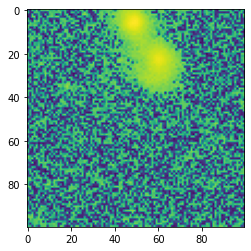

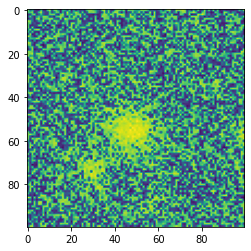

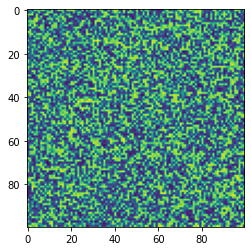

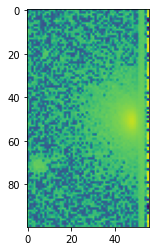

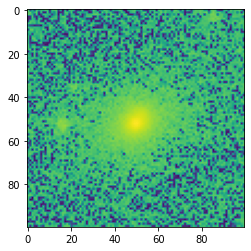

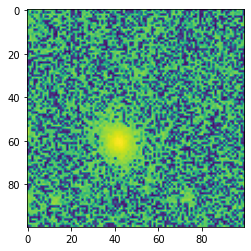

<ipython-input-51-3615dbb047e5>:2: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.imshow(np.arcsinh(image_list[i][int(x_pix_list[i])-50:int(x_pix_list[i])+50, int(y_pix_list[i])-50:int(y_pix_list[i])+50]))


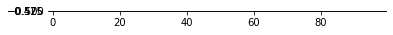

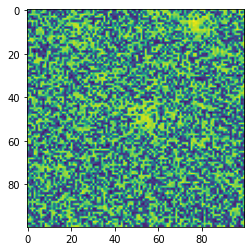

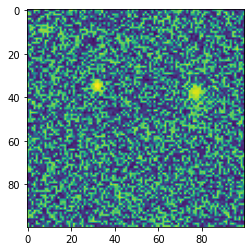

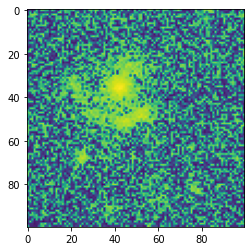

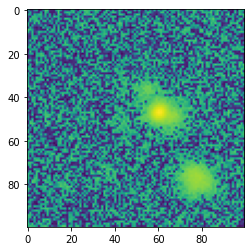

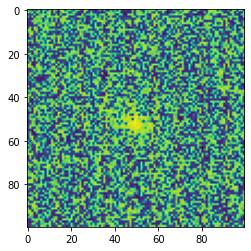

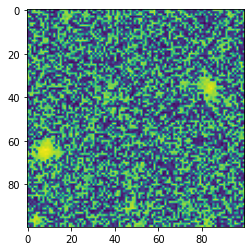

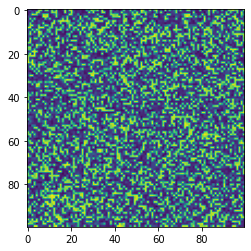

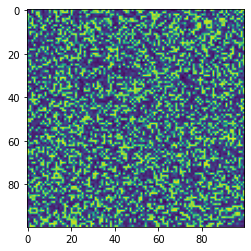

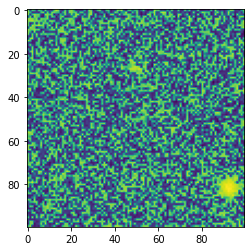

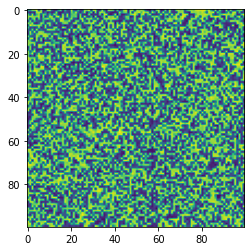

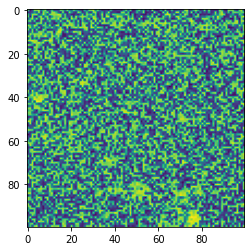

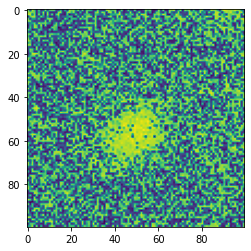

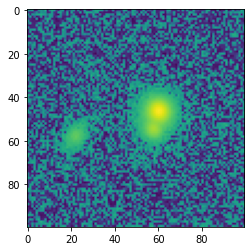

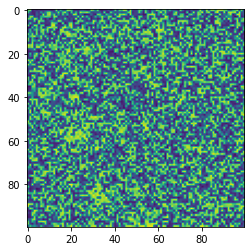

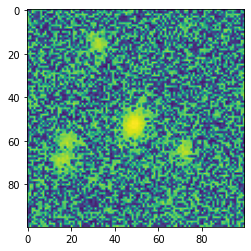

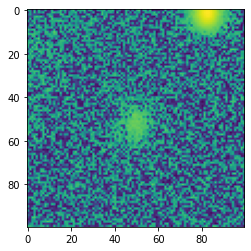

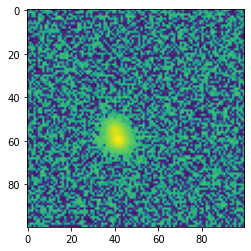

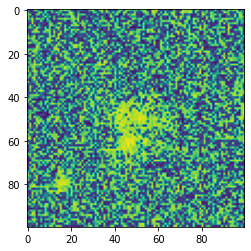

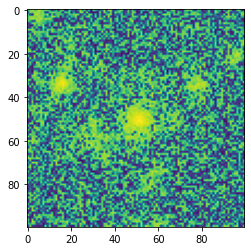

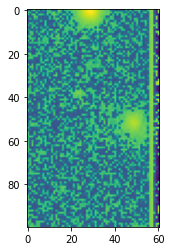

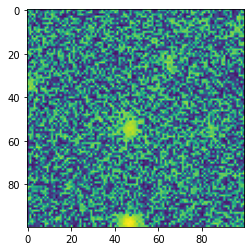

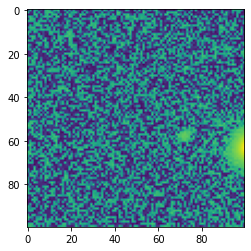

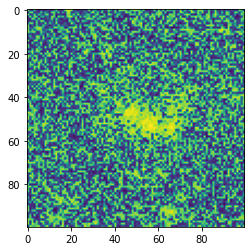

In [51]:
for i in range(30):
    plt.imshow(np.arcsinh(image_list[i][int(x_pix_list[i])-50:int(x_pix_list[i])+50, int(y_pix_list[i])-50:int(y_pix_list[i])+50]))
    plt.show()